# Cashflows package use-cases

By: **Rodrigo Hernandez Mota**

In [1]:
%matplotlib inline
from cashflows import CashFlow, CashFlowStream

## Algebraic properties

We define the following algebraic propoerties to test the CashFlow and CashFlowStream objects.

These properties arise for any set of cashflows corresponding to the same time value.

**Commutative property**

$$A + B = B + A$$

**Associative property**

$$(A + B) + C = A + (B + C)$$

**Distributive property**

$$r(A + B) = rA + rB$$

**Associative property scalar**

$$r(sA) = (rs)A$$

**Distributive property scalar**

$$(r + s)A = rA + sA$$


**Null or Empty**

* The empty cashflow is defined as the cashflow with value of zero for any given time.
* The empty cashflow-stream is defined as a stream with no cashflow objects.

$$A + Empty = A$$

**Negation**

$$A + A.neg = Empty$$




In [2]:
from typing import TypeVar

real_number = TypeVar('R', int, float)
cashflow_object = TypeVar('CF', CashFlow, CashFlowStream)

def test_commutative_property(A: cashflow_object, B: cashflow_object) -> bool:
    """A + B = B + A"""
    return A.add(B) == B.add(A)

def test_associative_property(A: cashflow_object, B: cashflow_object, C: cashflow_object) -> bool:
    """(A + B) + C = A + (B + C)"""
    return (A.add(B)).add(C) == A.add(B.add(C))

def test_distributive_property(A: cashflow_object, B: cashflow_object, r: real_number) -> bool:
    """r(A + B) = rA + rB"""
    return (A.add(B)).scale(r) == A.scale(r).add(B.scale(r))

def test_associative_propoerty_scalar(A: cashflow_object, r: real_number, s: real_number) -> bool:
    """r(sA) = (rs)A"""
    return A.scale(s).scale(r) == A.scale(r*s)

def test_distributive_property_scalar(A: cashflow_object, r: real_number, s: real_number) -> bool:
    """r + s)A = rA + sA"""
    return A.scale(r + s) == A.scale(r).add(A.scale(s))

def test_empty_set(A: cashflow_object, Empty: cashflow_object) -> bool:
    """A + Empty = A"""
    return A.add(Empty) == A

def test_negation(A: cashflow_object, Empty: cashflow_object) -> bool:
    """A + neg(A) = Empty"""
    return A.add(A.neg()) == Empty

def test_properties(A: cashflow_object, B: cashflow_object, C: cashflow_object, Empty: cashflow_object, r: real_number, s: real_number) -> bool:
    results = [
        test_commutative_property(A, B),
        test_associative_property(A, B, C),
        test_distributive_property(A, B, r),
        test_associative_propoerty_scalar(A, r, s),
        test_distributive_property_scalar(A, r, s),
        test_empty_set(A, Empty),
        test_negation(A, Empty)
    ]
    return all(results)


## Definition and examples

### Cashflow

A cashflow is defined as a monetary quantity fixed on a given time. This monetary quantity can be of the following nature: 
* **Inflow**: whenever the investor received money.
* **Outflow**: whenever the investor is required to give money away.

Let say we have $M$ monetary units. Then an inflow would be represented as $M$ and an outflow as $-M$. Selecting the nature of this quantity and defining a realization time, say $t=t_0$ it's essential to generate a cashflow.

Therefore, a cashflow instance has a monetary value and fixed time. 

#### OPERATIONS


**Attributes**

Given a well defined cashflow $A$ we can peek its attributes by performing:

* Time attribute: $A.time$
* Monetary units attribute: $A.value$

**Add operation**

If a cashflow $B$ its defined such that $A.time = B.time$ then the **add** operation can be performed.

$$C = A + B$$

Where:
* $C.time = A.time = B.time$
* $C.value = A.value + B.value$

**Scale operation**

Given a scalar $r$ the **scale** operation states that:

$$C = rA$$

Where:
* $C.time = A.time$
* $C.value = r * A.value$

The programming examples use methods to perform the special operations among cashflows. 

In [3]:
r = 0.75
A = CashFlow(value=10, time=1)
B = CashFlow(value=-7, time=1)
C = CashFlow(value=20, time=0)

print(str(A))
print(str(B))

Flow(type: inflow, time: 1, value: 10.0, currency: mxn)
Flow(type: outflow, time: 1, value: 7.0, currency: mxn)


In [6]:
# Add operation
C = A.add(B)

print(str(C))

Flow(type: inflow, time: 1, value: 3.0, currency: mxn)


In [11]:
# Add operation performed with uncompatible cashflows.
try:
    A.add(D)
except ValueError:
    print("This A.add(D) generates an error.")

This A.add(D) generates an error.


In [9]:
# Scale operation
C = A.scale(r)
print(str(C))

Flow(type: inflow, time: 1, value: 7.5, currency: mxn)


#### PROPERTIES

In [9]:
test_properties(
    A=CashFlow(value=10, time=1),
    B=CashFlow(value=-7, time=1),
    C=CashFlow(value=20, time=1),
    Empty=CashFlow(value=0, time=1),
    r=5,
    s=3
)

True

### Cashflow Stream

A stream of cashflows on its essence is a collection of individual non-compatible by time cashflows usually generated by a common financial asset. 

Let the core of a cashflow-stream $A$ be defined as:

$$A_c = (C_0, C_1, C_2, ..., C_n)$$

Where $C_i$ represents a cashflow with time-attribute i. 

Basic operations are defined among cashflow-streams in order to provide a basis to solve complex problems.

#### OPERATIONS

**Attributes**

A well define cashflow-stream has the following attributes:
* $A.length$: number of cashflows in the stream.
* $A.order$: max time-attribute in the stream.
* $A.flows$: list containing the iindividual non-compatible by time cashflows.

**Add operation**

Let $B$ be a well-defined cashflow-series of any order and lenght.

$$C = A + B$$

Where:
* $(C.flows)_t = (A.flows)_t + (B.flows)_t$ for each $t \leq max(A.order, B.order)$.

**Scale operation**

Let $r$ be a scalar. 

$$C = rA$$

Where:
* $C.flows = [r * a_i]$ where $a_i$ represents each elements of $A.flows$.

In [37]:
time_range = (0, 10)
value_range = (10, 100)
r = 5
A = CashFlowStream(time_type="int")
B = CashFlowStream(time_type="int")

A.random_initialization(n=5, time_range=time_range, value_range=value_range)
B.random_initialization(n=4, time_range=time_range, value_range=value_range)

In [39]:
# Add operation
C = A.add(B)
for stream in [A, B, C]:
    print(str(stream))

{
	Flow(type: inflow, time: 2, value: 6.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 57.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 63.0, currency: mxn)
	Flow(type: outflow, time: 1, value: 44.0, currency: mxn)
}
{
	Flow(type: inflow, time: 1, value: 63.0, currency: mxn)
	Flow(type: inflow, time: 9, value: 27.0, currency: mxn)
	Flow(type: outflow, time: 7, value: 40.0, currency: mxn)
}
{
	Flow(type: inflow, time: 2, value: 6.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 57.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 63.0, currency: mxn)
	Flow(type: inflow, time: 1, value: 19.0, currency: mxn)
	Flow(type: inflow, time: 9, value: 27.0, currency: mxn)
	Flow(type: outflow, time: 7, value: 40.0, currency: mxn)
}


In [41]:
# Scale operation
C = A.scale(r)

print(str(C))

{
	Flow(type: inflow, time: 2, value: 30.0, currency: mxn)
	Flow(type: outflow, time: 3, value: 285.0, currency: mxn)
	Flow(type: outflow, time: 0, value: 315.0, currency: mxn)
	Flow(type: outflow, time: 1, value: 220.0, currency: mxn)
}


### Properties

In [3]:
# Define a time interval between 0 and 10.
time_range = (0, 10)

# Define a value interval between 10 and 100
value_range = (10, 100)

test_properties(
    A=CashFlowStream(time_type="int").random_initialization(5, time_range, value_range, inplace=False),
    B=CashFlowStream(time_type="int").random_initialization(4, time_range, value_range, inplace=False),
    C=CashFlowStream(time_type="int").random_initialization(6, time_range, value_range, inplace=False),
    Empty=CashFlowStream(time_type="int"),
    r=5,
    s=3
)

True

## Example

Let's assume we participate in a bond based on the bitcoin cryptocurrency.

In [2]:
cash_stream = CashFlowStream(time_type="int", currency="BTC")

This bond costs 100 BTC at $t=0$ and generates the following cash-flows:

* $t=2, c=28$ 
* $t=3, c=50$
* $t=4, c=-10$ 
* $t=5, c=70$ 
* $t=8, c=-5$ 

The negative cashflows suggest you must perform a payment (outflow). 

In [3]:
cash_stream.put(time=0, value=-100)
cash_stream.put(time=2, value=28)
cash_stream.put(time=3, value=50)
cash_stream.put(time=4, value=-10)
cash_stream.put(time=5, value=70)
cash_stream.put(time=8, value=-5)

To visualize the complete stream:

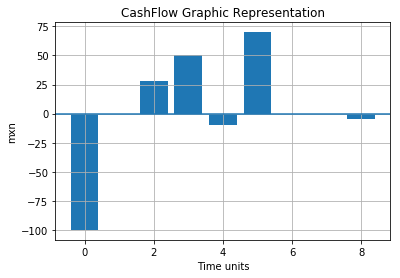

In [4]:
cash_stream.plot()

## Cash on cash multiple

The cash-on-cash multiple is a measure that indicates the relation among the output flows and the input flows. An investor will prefer values > 1.


$$
CCM = \frac{\sum_i^n outflow_i }{\sum_j^m inflow_j }
$$

To get this value call the method *.get_cash_on_cash_multiple()*

In [10]:
CCM = "The cash-on-cash multiple of the investment: %0.2f"

print(CCM % cash_stream.get_cash_on_cash_multiple())

The cash-on-cash multiple of the investment: 1.29


## Internal Return Rate

The IRR represent the rate at which the cash-flow structure adds value to the invested money. In essence, the IRR is a rate $r$ such that:

$$
\sum_{i=0}^n \frac{C_i}{(1+r)^i} = 0
$$

{note: add theory}

In [12]:
IRR = "The internal return rate of the investment: %0.2f annual."

print(IRR % cash_stream.get_irr())

The internal return rate of the investment: 8.40 annual.


## Dates

Use date timestamps for cashflow streams.

In [14]:
cash_stream_date = CashFlowStream(time_type="date")

In [15]:
cash_stream_date.put(time="2018-01-01", value=100)
cash_stream_date.put(time="2020-01-01", value=-50)
cash_stream_date.put(time="2022-01-01", value=-80)
cash_stream_date.put(time="2022-01-01", value=10)

Same metrics are available using the xnpv and xirr functions (based on days).

In [18]:
res = "Cash-on-cash multiple: %0.2f \nIRR: %0.2f percent." % (cash_stream_date.get_cash_on_cash_multiple(), cash_stream_date.get_irr())

print(res)

Cash-on-cash multiple: 0.83 
IRR: 5.98 percent.


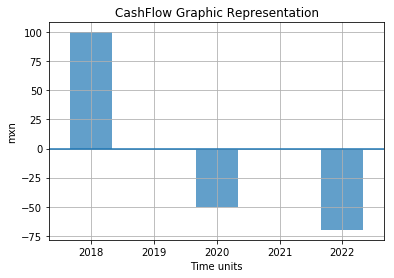

In [16]:
cash_stream_date.plot()